# Data processing in Python midterm - Martina Juračková

# Part 1

In [1]:
import json
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [37]:
my_payload = '{"cuni":"95994545"}' # setting the payload with my personal number
req = requests.post('https://ies-midterm.soulution.rocks/login', my_payload)

In [38]:
req # we got <Response [200]> which is good - we can continue without major hiccups

<Response [200]>

In [39]:
req.text

'{"data": {"personal_code": "b86111a9", "dataset_ids": ["288b147f95", "dabd98d224", "f36bd332b4", "2d1aef30ed", "8f8c9919a6", "f894683be9"]}, "message": "Hello, Jura\\u010dkov\\u00e1 Martina, Bc.! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook."}'

In [40]:
req_json=req.json()
req_json

{'data': {'personal_code': 'b86111a9',
  'dataset_ids': ['288b147f95',
   'dabd98d224',
   'f36bd332b4',
   '2d1aef30ed',
   '8f8c9919a6',
   'f894683be9']},
 'message': 'Hello, Juračková Martina, Bc.! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook.'}

In [41]:
dta = json.loads(req.text)

In [42]:
dta

{'data': {'personal_code': 'b86111a9',
  'dataset_ids': ['288b147f95',
   'dabd98d224',
   'f36bd332b4',
   '2d1aef30ed',
   '8f8c9919a6',
   'f894683be9']},
 'message': 'Hello, Juračková Martina, Bc.! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook.'}

In [43]:
dta.keys() #see what the keys are and next have a look at them

dict_keys(['data', 'message'])

In [44]:
dta['data']

{'personal_code': 'b86111a9',
 'dataset_ids': ['288b147f95',
  'dabd98d224',
  'f36bd332b4',
  '2d1aef30ed',
  '8f8c9919a6',
  'f894683be9']}

In [45]:
dta['message']

'Hello, Juračková Martina, Bc.! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook.'

In [46]:
dta['data']['personal_code'] #print the personal code from the response

'b86111a9'

In [47]:
dta['data']['dataset_ids']

['288b147f95',
 'dabd98d224',
 'f36bd332b4',
 '2d1aef30ed',
 '8f8c9919a6',
 'f894683be9']

In [48]:
list_of_codes = dta['data']['dataset_ids'] #saving the list of codes as list_of_codes
list_of_codes

['288b147f95',
 'dabd98d224',
 'f36bd332b4',
 '2d1aef30ed',
 '8f8c9919a6',
 'f894683be9']

In [59]:
# first, create a function for loading the data

url = 'https://ies-midterm.soulution.rocks/'
def load_data(dataset_id):
    req = requests.get(f"{url}data/{dataset_id}")
    return req.json()

In [60]:
# next, use looping for loading the data into python

warning_message = 'Error - you need to work this out.'
datas = []
for idd in req_json['data']['dataset_ids']:
    successful = False
    # load the dataset again until it succeeds
    while not successful:
        data = load_data(idd)
        if data['message'] == warning_message:  # if data not loaded continue with while loop
            
            continue
        else:
           
            datas.append(data)  # apend data to datas list 
            successful = True   # break the loop if successful

In [61]:
# finally, create the dataframe

my_datafr = pd.DataFrame(datas[0]['data']['data'])
my_datafr = my_datafr.melt(id_vars=['Date'], var_name="type", value_name=datas[0]['data']['company']).set_index(['Date', 'type'])
my_datafr[datas[0]['data']['company']] = pd.to_numeric(my_datafr[datas[0]['data']['company']], downcast="float")

for data in datas[1:]:
    datafr = pd.DataFrame(data['data']['data'])
    datafr = datafr.melt(id_vars=['Date'], var_name="type", value_name=data['data']['company']).set_index(['Date', 'type'])
    datafr[data['data']['company']] = pd.to_numeric(datafr[data['data']['company']], downcast="float")
    
    my_datafr = my_datafr.join(datafr, how="outer")  # put together two dataframes

my_datafr.tail(n=20)



KeyError: 'data'

In [ ]:
# the above doesnt work - try something else

In [65]:
colltr = {}
att = 10
for data_id in list_of_codes:
    req = requests.get(url=f'https://ies-midterm.soulution.rocks/data/{data_id}')
    i = 0
    while req.status_code !=200:  
        req=requests.get(url=f'https://ies-midterm.soulution.rocks/data/{data_id}')
        time.sleep(1)
    dta=req.json()['data']
    
    ticker = dta['company']
    data = pd.DataFrame(dta['data']).set_index('Date')
    data.index = pd.to_datetime(data.index)
    
    colltr[ticker] = data
    
my_dataframe = pd.concat(colltr)
my_dataframe.index.names = ['Ticker','Date']
my_dataframe.dropna(how='all',inplace = True)
my_dataframe = my_dataframe.apply(lambda x: pd.to_numeric(x))

In [66]:
my_dataframe

Open         High          Low        Close  \
Ticker Date                                                             
JET    2019-01-02   337.899994   337.899994   329.000000   329.000000   
       2019-01-03   328.350006   347.450012   328.299988   345.000000   
       2019-01-04   342.399994   347.000000   341.000000   346.950012   
       2019-01-07   350.000000   353.899994   345.000000   345.200012   
       2019-01-08   348.799988   348.899994   340.049988   340.799988   
...                        ...          ...          ...          ...   
HIK    2020-11-16    10.230000    10.230000    10.230000    10.230000   
       2020-11-17    10.230000    10.230000    10.230000    10.230000   
       2020-11-18    10.230000    10.230000    10.230000    10.230000   
       2020-11-19    10.230000    10.230000    10.230000    10.230000   
RTO    2020-01-24  1865.000000  1865.000000  1865.000000  1865.000000   

                     Adj.Close  Volume  
Ticker Date                             
JET    2019-01-02   329.000000     501  
       2019-01-03   345.000000   17057  
       2019-01-04   346.950012   14725  
       2019-01-07   345.200012    5794  
       2019-01-08   340.799988     653  
...                        ...     ...  
HIK    2020-11-16    10.230000       0  
       2020-11-17    10.230000       0  
       2020-11-18    10.230000       0  
       2020-11-19    10.230000       0  
RTO    2020-01-24  1865.000000       0  

[2282 rows x 6 columns]

# Part 2

In [67]:
# time series from 2019-01-02 to 2020-11-20

my_dataframe.reset_index('Date')['Date'].groupby('Ticker').min() # the series starts at 2019-01-02 - good

Ticker
ADM   2019-01-02
HIK   2019-01-02
JET   2019-01-02
RIO   2019-01-02
RTO   2020-01-24
SKG   2019-01-02
Name: Date, dtype: datetime64[ns]

In [68]:
# time series from 2019-01-02 to 2020-11-20

my_dataframe.reset_index('Date')['Date'].groupby('Ticker').max() # the series ends at 2020-11-20 - great - that is what we wanted

Ticker
ADM   2020-11-20
HIK   2020-11-19
JET   2020-11-20
RIO   2020-11-20
RTO   2020-01-24
SKG   2020-11-20
Name: Date, dtype: datetime64[ns]

In [80]:
# highest Adj Close price the company recorded
max_adj_cl = my_dataframe.groupby('Ticker')['Adj.Close'].max()
max_adj_cl.head()
#max_adj_cl.tail()

Ticker
JET      346.950012
SKG    15863.599609
ADM       51.497726
RIO       65.430000
HIK       10.230000
Name: Adj.Close, dtype: float64

In [81]:
# lowest Adj Close price the company recorded
min_adj_cl = my_dataframe.groupby('Ticker')['Adj.Close'].min()
min_adj_cl
#max_adj_cl.head()
max_adj_cl.tail()

Ticker
SKG    15863.599609
ADM       51.497726
RIO       65.430000
HIK       10.230000
RTO     1865.000000
Name: Adj.Close, dtype: float64

In [91]:
# what day was the highest number of shares traded 

#my_dataframe.groupby('Date')['Volume'].value_counts()
#my_dataframe.groupby('Date')[['Ticker','Volume']].value_counts()
#my_dataframe.groupby('Ticker')['Volume'].value_counts()

#my_dataframe.groupby('Ticker')['Volume'].max()

my_dataframe.groupby('Ticker')['Volume'].idxmax()

Ticker
JET    (JET, 2020-01-09 00:00:00)
SKG    (SKG, 2020-04-23 00:00:00)
ADM    (ADM, 2019-02-05 00:00:00)
RIO    (RIO, 2019-03-19 00:00:00)
HIK    (HIK, 2019-01-02 00:00:00)
RTO    (RTO, 2020-01-24 00:00:00)
Name: Volume, dtype: object

In [82]:
# what is the total of shares traded  
total_shares = my_dataframe.groupby('Ticker')['Volume'].sum() 
total_shares

Ticker
JET        767178
SKG      69129712
ADM    1553753100
RIO    1125708200
HIK             0
RTO             0
Name: Volume, dtype: int64

<AxesSubplot:xlabel='Date'>

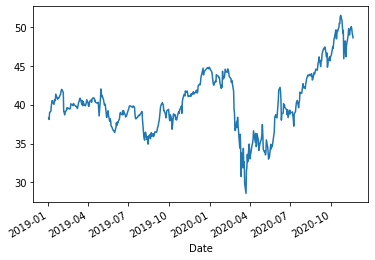

In [78]:
# for the company with the highest volume of shares traded over the whole period, plot their share price over time

my_dataframe.loc['ADM',:]['Adj.Close'].plot()

In [93]:
# when did the company record the highest gain and highest loss for the day? (logarithmic loss) 
my_dataframe.loc['ADM',:]['Adj.Close']

KeyError: 'Adj.Close'